# Import packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split

# Custom functions

In [2]:
from dataset_expansion import dataset_feature_expansion, merge_multiple_dfs
from dataset_cleanup import filter_low_variance, read_tsv_to_df
from dataset_plot import simple_pie_plot

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


# Regression dataset

## Convert and clean .tsv files to .csv files

In [3]:
regression_tsv = 'datasets\original_datasets\B3DB_regression.tsv'
regression_df = read_tsv_to_df(regression_tsv)
regression_df

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN
...,...,...,...,...,...,...,...,...,...,...
1053,1054,2qju,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)prop...",C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,2995.0|2995.0|2995.0|2995.0|2995.0|2995.0|2995...,1.20,InChI=1S/C18H22N2/c1-19-13-6-14-20-17-9-4-2-7-...,R4|R3|R38|R41|R43|R47|R49|R40|R8|R21|R27|R2|R2...,D,NaN
1054,1055,promazine,"n,n-dimethyl-3-phenothiazin-10-ylpropan-1-amine",CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,4926.0|4926.0|4926.0|4926.0|4926.0|4926.0|4926...,1.23,InChI=1S/C17H20N2S/c1-18(2)12-7-13-19-14-8-3-5...,R3|R4|R50|R40|R38|R41|R8|R21|R27|R2|R2|R27|R3|...,D,NaN
1055,1056,diphenhydramine,"2-benzhydryloxy-n,n-dimethylethanamine",CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,3100.0|3100.0|3100.0|3100.0|3100.0|3100.0|3100...,1.30,InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3...,R42|R2|R2|R3|R8|R18|R21|R25|R26|R27|R27|R27|R3...,D,NaN
1056,1057,1225-64-5,3-(2-chlorophenothiazin-10-yl)-n-methylpropan-...,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,62875.0|62875.0|62875.0|62875.0|62875.0|62875....,1.40,InChI=1S/C16H17ClN2S/c1-18-9-4-10-19-13-5-2-3-...,R18|R26|R27|R4|R11|R12|R20|R25|R35|R36|R39|R43...,D,NaN


In [4]:
regression_df = regression_df[
    [
        'SMILES',
        'logBB'
    ]
]

regression_df

,SMILES,logBB
0,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,-2.52
1,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,-2.15
2,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,-2.09
3,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,-1.88
4,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,-1.82
...,...,...
1053,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20
1054,CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,1.23
1055,CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,1.30
1056,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,1.40


In [5]:
regression_df.to_csv(
    'datasets\cleaned_datasets\BBB_regression.csv',
    index=False
)

print('Done!')

Done!


In [6]:
(regression_df['logBB'] <= -1.01).sum()  #These are BBB-

128

In [7]:
(regression_df['logBB'] >= -1).sum()  #These are BBB+

930

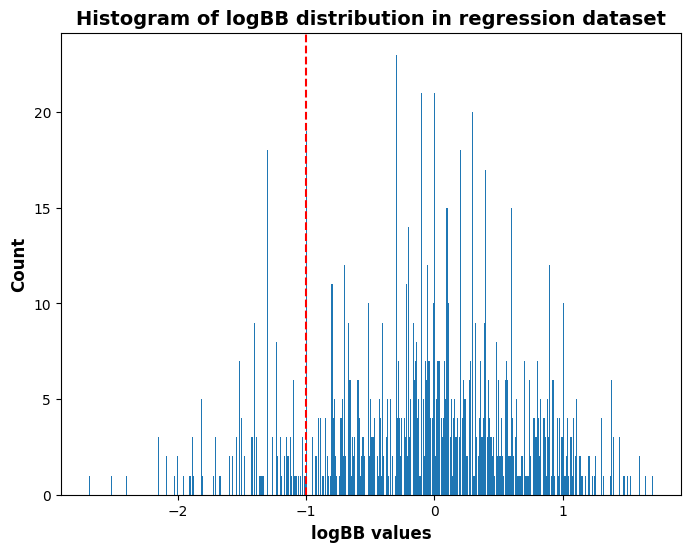

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.hist(
    regression_df['logBB'],
    bins=500,
    # alpha=0.7,
    density=False  #Force to use count as the y-axis
)

plt.axvline(
    x=-1,
    color='red',
    linestyle='--'
)  #Plot out the cutoff line for BBB+ vs BBB-

plt.xlabel('logBB values', weight='bold', fontsize=12)
plt.ylabel('Count', weight='bold', fontsize=12)
plt.title('Histogram of logBB distribution in regression dataset',
          weight='bold', fontsize=14)

plt.savefig(
    r'model_outputs\data_preprocessing\regression_histogram.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

## Dataset expansion & cleaning
Major expansion steps:
1. Add in RDKit descriptors
2. Add in Morgan fingerprints
3. Add in MACCS keys

Major cleaning steps:
1. Remove columns whose variance is 0--all values are hte same
    * Done by a function so later the threshold for filtering
    based on variance level is adjustable

In [9]:
regression_df_expanded, regression_expansion_errors = dataset_feature_expansion(
    regression_df
)
regression_df_expanded  #Missing SMILES are the chemicals that have errors
# when going through the calculations

C:\Users\louie\Desktop\BME 790L\final project\BBBPrediction\venv\lib\site-packages\rdkit\Chem\PandasTools.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
Failed to patch pandas - unable to change molecule rendering


Generating 210 RDKit descriptors:   0%|          | 0/1058 [00:00<?, ?it/s]

Generating 4096 Morgan fingerprints:   0%|          | 0/1058 [00:00<?, ?it/s]

Generating 167 MACCS keys:   0%|          | 0/1058 [00:00<?, ?it/s]

,SMILES,logBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,157_y,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y
0,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,-2.52,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,500.320,...,1,1,1,1,1,1,1,1,1,0
1,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,-2.15,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,434.251,...,1,1,1,1,1,1,1,1,1,0
2,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,-2.09,11.479044,11.479044,0.060963,-1.790095,0.359144,45.393939,461.467,434.251,...,1,1,1,1,1,1,1,1,1,0
3,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,-1.88,12.391214,12.391214,0.061101,-0.159783,0.543803,19.464286,446.393,418.169,...,0,1,0,1,1,1,1,1,1,0
4,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,-1.82,12.699094,12.699094,0.092039,-2.255140,0.648321,14.192308,375.772,361.660,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20,2.515046,2.515046,1.095602,1.095602,0.843816,13.550000,267.396,244.212,...,0,1,0,1,1,1,1,0,1,0
1047,CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,1.23,2.462963,2.462963,1.062269,1.062269,0.828858,13.250000,284.428,264.268,...,0,1,0,1,1,1,1,0,1,0
1048,CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,1.30,6.083380,6.083380,0.016065,0.016065,0.784550,11.157895,255.361,234.193,...,1,1,0,1,1,1,1,1,1,0
1049,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,1.40,6.182100,6.182100,0.793840,0.793840,0.834133,13.000000,304.846,287.710,...,0,1,0,1,1,1,1,0,1,0


In [10]:
regression_df_expanded_cleaned = filter_low_variance(
    regression_df_expanded,
    exclude_col_list=['SMILES', 'logBB'],
    threshold_level=0
)
regression_df_expanded_cleaned

Before removing the low-variance descriptors, the dataset has 4473 descriptors
After removing the zero-variance descriptors, the dataset has 4101 descriptors


,SMILES,logBB,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,157_y,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y
0,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,-2.52,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,500.320,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,-2.15,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,434.251,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,-2.09,11.479044,11.479044,0.060963,-1.790095,0.359144,45.393939,461.467,434.251,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,-1.88,12.391214,12.391214,0.061101,-0.159783,0.543803,19.464286,446.393,418.169,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,-1.82,12.699094,12.699094,0.092039,-2.255140,0.648321,14.192308,375.772,361.660,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,1.20,2.515046,2.515046,1.095602,1.095602,0.843816,13.550000,267.396,244.212,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1047,CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,1.23,2.462963,2.462963,1.062269,1.062269,0.828858,13.250000,284.428,264.268,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1048,CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,1.30,6.083380,6.083380,0.016065,0.016065,0.784550,11.157895,255.361,234.193,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1049,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,1.40,6.182100,6.182100,0.793840,0.793840,0.834133,13.000000,304.846,287.710,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


In [11]:
regression_df_expanded_cleaned.to_csv(
    'datasets\expanded_datasets\BBB_regression_expanded.csv.zip',
    index=False,
    compression='zip'  # Have to use zip here since the classification
    # dataset will become very large. Zipped .csv files can be directly read
    # by pd.read_csv()
)
print('Done!')

Done!


## Dataset holdout

In [12]:
regression_df_X = regression_df_expanded_cleaned.drop(columns=['logBB'])
regression_y = regression_df_expanded_cleaned['logBB']

regression_X_train, regression_X_holdout, regression_y_train, regression_y_holdout = train_test_split(
    regression_df_X,
    regression_y,
    test_size=0.1,
    random_state=1
)

In [13]:
regression_df_expanded_cleaned_train = merge_multiple_dfs(
    [regression_X_train, regression_y_train]
)
regression_df_expanded_cleaned_train

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,logBB
857,CC(C)(C)OC(=O)CCCC1=CC=C(C=C1)N(CCCl)CCCl,11.682268,11.682268,0.134704,-0.409691,0.474821,11.347826,360.325,333.109,359.141884,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.00
789,Clc1ccc(N2)c(C(C)=NC(O)C2=O)c1,11.306112,11.306112,0.532016,-1.350763,0.700249,20.066667,224.647,215.575,224.035255,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.61
175,CC1=C2OC3=C(C=CC=C3)C3(O)CNCC3C2=CC=C1,11.238358,11.238358,0.028750,-0.893218,0.770818,27.000000,267.328,250.192,267.125929,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.39
349,C[C@H]1[C@H]([C@H](C[C@@H](O1)O[C@H]2C[C@@](CC...,13.643057,13.643057,0.017252,-2.240737,0.235263,29.846154,543.525,514.293,543.174061,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.83
962,CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2,11.975791,11.975791,0.293611,-1.310347,0.736884,18.529412,232.239,220.143,232.084792,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,C(=O)(N)N,9.000000,9.000000,0.833333,-0.833333,0.370507,6.000000,60.056,56.024,60.032363,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.14
847,C[C@@H](CC1=CC=CC=C1)NC,3.213399,3.213399,0.567037,0.567037,0.691109,12.909091,149.237,134.117,149.120449,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.96
715,CNC(=O)C1=C(N=C(N=C1OCC2CCN(CC2)C)C#N)NCC3CCC4...,12.730831,12.730831,0.023700,-0.298674,0.670950,21.531250,440.592,404.304,440.289974,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.37
905,CCC1=C2C(=CC=C1)C3=C(N2)C(OCC3)(CC)CC(=O)O,11.285827,11.285827,0.004742,-0.820305,0.905784,21.428571,287.359,266.191,287.152144,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-1.42


In [14]:
regression_df_expanded_cleaned_holdout = merge_multiple_dfs(
    [regression_X_holdout, regression_y_holdout]
)
regression_df_expanded_cleaned_holdout

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,logBB
49,CC1=CN(C(=O)NC1=O)[C@@H]2C[C@@H]([C@@H](O2)CO)...,11.700274,11.700274,0.264561,-0.670648,0.445400,26.105263,267.245,254.141,267.096754,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.72
741,C1=CC(=C(C=C1C(=O)NC2=CN=C(C=C2)Cl)F)F,12.946453,12.946453,0.017454,-1.072332,0.849604,10.166667,268.650,261.594,268.021497,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.44
358,CC(=C)C(=O)/C(=C\C(=O)O)/OC,11.053380,11.053380,0.212963,-1.220880,0.499061,10.666667,170.164,160.084,170.057909,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.79
993,CC1=CC(=CC=C1)C,2.166667,2.166667,1.337963,1.337963,0.475758,9.250000,106.168,96.088,106.078250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.20
639,C(=C/F)\O/C=C/F,10.854583,10.854583,0.166667,0.166667,0.488155,11.142857,106.071,102.039,106.023021,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Nc1c2c(NC(C)C(c3ccccc3)=N2)cc(CC(OCC)=O)n1,11.642240,11.642240,0.025133,-0.317885,0.844065,15.916667,324.384,304.224,324.158626,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.27
274,CC1(C2CCC3(C(C2(CCC1O)C)C(=O)C=C4C3(CCC5(C4CC(...,14.202352,14.202352,0.029556,-0.711072,0.464074,54.117647,470.694,424.326,470.339610,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.40
386,C1=CC=NC(=C1)CSCCNC2=C(C=CN2)[N+](=O)[O-],10.688823,10.688823,0.078450,-0.402912,0.461899,10.315789,278.337,264.225,278.083747,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.66
393,C1CN(CC1C(C2=CC=CC=C2)(C3=CC=CC=C3)C(=O)N)CCC4...,13.195604,13.195604,0.137241,-0.817283,0.622271,18.312500,426.560,396.320,426.230728,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.62


In [15]:
regression_df_expanded_cleaned_train.to_csv(
    r'datasets\train_datasets\regression_df_expanded_cleaned_train.csv.zip',
    index=False,
    compression='zip'
)

regression_df_expanded_cleaned_holdout.to_csv(
    r'datasets\holdout_datasets\regression_df_expanded_cleaned_holdout.csv'
    r'.zip',
    index=False,
    compression='zip'
)

print('Done!')

Done!


# Classification dataset

## Convert and clean .tsv files to .csv files

In [16]:
classification_tsv = 'datasets\original_datasets\B3DB_classification.tsv'
classification_df = read_tsv_to_df(classification_tsv)
classification_df

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7802,7803,antazoline,"n-benzyl-n-(4,5-dihydro-1h-imidazol-2-ylmethyl...",c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,2200.0,NaN,BBB-,InChI=1S/C17H19N3/c1-3-7-15(8-4-1)13-20(14-17-...,NaN,R14|R23|R50|,D,NaN
7803,7804,emedastine,"1-(2-ethoxyethyl)-2-(4-methyl-1,4-diazepan-1-y...",CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,3219.0,NaN,BBB+,InChI=1S/C17H26N4O/c1-3-22-14-13-21-16-8-5-4-7...,NaN,R15|R23|R50|,D,NaN
7804,7805,ketotifen,2-(1-methylpiperidin-4-ylidene)-6-thiatricyclo...,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,3827.0,NaN,BBB+,InChI=1S/C19H19NOS/c1-20-9-6-13(7-10-20)18-15-...,NaN,R15|R27|R50|,D,NaN
7805,7806,milrinone,6-methyl-2-oxo-5-pyridin-4-yl-1h-pyridine-3-ca...,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,4197.0,NaN,BBB-,InChI=1S/C12H9N3O/c1-8-11(9-2-4-14-5-3-9)6-10(...,NaN,R15|R23|R27|,D,NaN


In [17]:
classification_df = classification_df[
    ['SMILES', 'BBB+/BBB-']
]

classification_df

,SMILES,BBB+/BBB-
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-
...,...,...
7802,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-
7803,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+
7804,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+
7805,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-


In [18]:
classification_df.to_csv(
    'datasets\cleaned_datasets\BBB_classification.csv',
    index=False
)

print('Done!')

Done!


In [19]:
value_counts = classification_df['BBB+/BBB-'].value_counts()
value_counts

BBB+/BBB-
BBB+    4956
BBB-    2851
Name: count, dtype: int64

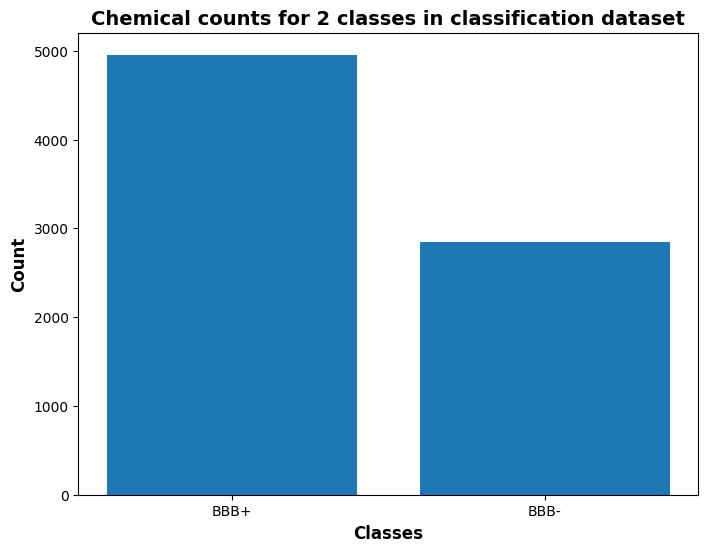

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.bar(value_counts.index, value_counts.values)

plt.xlabel('Classes', weight='bold', fontsize=12)
plt.ylabel('Count', weight='bold', fontsize=12)
plt.title('Chemical counts for 2 classes in classification dataset',
          weight='bold', fontsize=14)

plt.savefig(
    r'model_outputs\data_preprocessing\classification_classes_counts.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

## Dataset expansion & cleaning
Major expansion steps:
1. Add in RDKit descriptors
2. Add in Morgan fingerprints
3. Add in MACCS keys

Major cleaning steps:
1. Remove columns whose variance is 0--all values are hte same
    * Done by a function so later the threshold for filtering
    based on variance level is adjustable

In [21]:
classification_df_expanded, classification_expansion_errors = dataset_feature_expansion(
    classification_df)
classification_df_expanded

C:\Users\louie\Desktop\BME 790L\final project\BBBPrediction\venv\lib\site-packages\rdkit\Chem\PandasTools.py:375: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
Failed to patch pandas - unable to change molecule rendering


Generating 210 RDKit descriptors:   0%|          | 0/7807 [00:00<?, ?it/s]

Generating 4096 Morgan fingerprints:   0%|          | 0/7807 [00:00<?, ?it/s]

Generating 167 MACCS keys:   0%|          | 0/7807 [00:00<?, ?it/s]

,SMILES,BBB+/BBB-,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,157_y,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,384.288,...,1,1,1,0,1,1,1,1,1,0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,500.320,...,1,1,1,1,1,1,1,1,1,0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,300.462,...,1,0,0,0,1,1,1,1,1,0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,326.138,...,0,1,0,1,1,1,1,0,1,0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,434.251,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,4.506501,4.506501,0.832250,0.832250,0.899820,13.700000,265.360,246.208,...,0,1,0,0,1,1,1,0,1,0
7798,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,5.564458,5.564458,0.733727,0.733727,0.793110,17.090909,302.422,276.214,...,1,1,0,1,1,1,1,1,1,0
7799,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,12.589347,12.589347,0.264794,0.264794,0.732528,18.863636,309.434,290.282,...,0,1,0,1,1,1,1,1,1,0
7800,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,11.364205,11.364205,0.122604,-0.349254,0.778670,9.750000,211.224,202.152,...,0,0,0,1,1,1,1,1,1,0


In [22]:
classification_df_expanded_cleaned = filter_low_variance(
    classification_df_expanded,
    exclude_col_list=['SMILES', 'BBB+/BBB-'],
    threshold_level=0
)
classification_df_expanded_cleaned

Before removing the low-variance descriptors, the dataset has 4473 descriptors
After removing the zero-variance descriptors, the dataset has 4454 descriptors


,SMILES,BBB+/BBB-,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,157_y,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y
0,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,BBB-,12.341010,12.341010,0.023055,-3.794932,0.540588,11.428571,398.400,384.288,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,BBB-,13.190522,13.190522,0.042537,-2.144257,0.133795,22.000000,520.480,500.320,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,Oc1c(I)cc(Cl)c2cccnc12,BBB-,9.654043,9.654043,0.195000,0.195000,0.758308,10.615385,305.502,300.462,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,CCNC(=NCCSCc1ncccc1Br)NC#N,BBB-,8.544584,8.544584,0.532052,0.532052,0.272365,10.894737,342.266,326.138,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,BBB-,11.445328,11.445328,0.165306,-1.798901,0.346256,45.303030,461.467,434.251,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,c1ccc(CN(CC2=NCCN2)c2ccccc2)cc1,BBB-,4.506501,4.506501,0.832250,0.832250,0.899820,13.700000,265.360,246.208,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
7798,CCOCCn1c(N2CCCN(C)CC2)nc2ccccc21,BBB+,5.564458,5.564458,0.733727,0.733727,0.793110,17.090909,302.422,276.214,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7799,CN1CCC(=C2c3ccccc3CC(=O)c3sccc32)CC1,BBB+,12.589347,12.589347,0.264794,0.264794,0.732528,18.863636,309.434,290.282,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7800,Cc1[nH]c(=O)c(C#N)cc1-c1ccncc1,BBB-,11.364205,11.364205,0.122604,-0.349254,0.778670,9.750000,211.224,202.152,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [23]:
classification_df_expanded_cleaned.to_csv(
    'datasets\expanded_datasets\BBB_classification_expanded.csv.zip',
    index=False,
    compression='zip'
)
print('Done!')

Done!


## Dataset holdout

In [24]:
classification_df_X = classification_df_expanded_cleaned.drop(
    columns=['BBB+/BBB-'])
classification_y = classification_df_expanded_cleaned['BBB+/BBB-']

classification_X_train, classification_X_holdout, classification_y_train, classification_y_holdout = train_test_split(
    classification_df_X,
    classification_y,
    test_size=0.1,
    random_state=1,
    stratify=classification_y  #Ensure the ratio of the 2 classes in the
    # holdout set is the same as the train set
)

In [25]:
classification_df_expanded_cleaned_train = merge_multiple_dfs(
    [classification_X_train, classification_y_train])
classification_df_expanded_cleaned_train

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,BBB+/BBB-
7320,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@H](NC(=...,12.063107,12.063107,0.135723,-2.387780,0.068220,47.425000,581.580,542.268,581.265670,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,BBB-
3014,CCCCC[C@H](N)C(O)(c1ccccc1)c1ccccc1,11.396790,11.396790,0.311250,-1.128709,0.758581,13.095238,283.415,258.215,283.193614,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
4968,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)[C@H]...,12.772648,12.772648,0.040908,-1.182162,0.324701,21.062500,493.592,474.440,493.054832,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
4931,C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C(Cl)=...,16.987088,16.987088,0.036070,-2.333658,0.607687,52.700000,444.902,417.686,444.151508,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,BBB+
699,CC(C)=CCN1Cc2cc(Cl)cc3[nH]c(=S)n(c23)C[C@@H]1C,6.259474,6.259474,0.428218,0.428218,0.649100,18.761905,321.877,301.717,321.106646,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4761,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,13.042813,13.042813,0.190845,-3.798036,0.233814,31.275000,594.668,564.428,594.145421,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
5435,Brc1c(NC2=NCCN2)ccc2nccnc12,4.306315,4.306315,0.799945,0.799945,0.840528,14.529412,292.140,282.060,291.011957,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
2415,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,14.607685,14.607685,0.137208,-1.275102,0.893230,18.125000,331.347,313.203,331.133220,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
6259,CCOC(=O)NN[C@H](C)c1ccccc1,10.982986,10.982986,0.051487,-0.458073,0.743941,11.866667,208.261,192.133,208.121178,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+


In [26]:
classification_df_expanded_cleaned_holdout = merge_multiple_dfs(
    [classification_X_holdout, classification_y_holdout])
classification_df_expanded_cleaned_holdout

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,BBB+/BBB-
2570,c1ccc2c(c1)CCc1ccccc1N2C1CN2CCC1CC2,2.702037,2.702037,0.636944,0.636944,0.785000,28.869565,304.437,280.245,304.193949,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
1754,CN(C)CCN1C(=O)CC(c2ccccc2)Sc2ccccc21,12.867357,12.867357,0.175191,0.175191,0.853240,17.956522,326.465,304.289,326.145284,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
3356,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1C[C@...,12.770676,12.770676,0.058604,-0.957338,0.410670,36.750000,334.332,316.188,334.127720,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,BBB-
5037,C[C@@H]1[C@H]2Cc3ccc(O)cc3[C@]1(C)CCN2CC1CC1,9.854940,9.854940,0.247064,0.247064,0.891630,36.700000,271.404,246.204,271.193614,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
6462,COC(=O)[C@H]1NC(=O)[C@H]2NC(=O)[C@@H](NC(=O)[C...,16.191284,16.191284,0.014526,-2.350019,0.110163,25.549020,1446.182,1383.686,1444.325400,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,CCC(=C(c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,5.870988,5.870988,0.692414,0.692414,0.450573,12.000000,371.524,342.292,371.224915,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
2151,C[N+]1(C)CCCC(OC(=O)C(O)(c2ccccc2)c2ccccc2)C1,13.065964,13.065964,0.171112,-1.794534,0.687558,20.040000,340.443,314.235,340.190720,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
5572,C/C=C/C(=O)N(CC)c1ccccc1C,11.766069,11.766069,0.036389,0.036389,0.691577,10.600000,203.285,186.149,203.131014,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
4747,CC1(C)O[C@@H]2CC3C4CC[C@H]5CC(=O)CC[C@]5(C)[C@...,17.225172,17.225172,0.060763,-1.821031,0.688737,55.193548,438.536,403.256,438.241767,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,BBB+


In [27]:
classification_df_expanded_cleaned_train.to_csv(
    r'datasets\train_datasets\classification_df_expanded_cleaned_train.csv.zip',
    index=False,
    compression='zip'
)

classification_df_expanded_cleaned_holdout.to_csv(
    r'datasets\holdout_datasets\classification_df_expanded_cleaned_holdout.csv'
    r'.zip',
    index=False,
    compression='zip'
)

print('Done!')

Done!


## Dataset balance

In [28]:
classification_df_expanded_cleaned = pd.read_csv(
    r'datasets\train_datasets\classification_df_expanded_cleaned_train.csv.zip')
classification_df_expanded_cleaned

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y,BBB+/BBB-
0,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@H](NC(=...,12.063107,12.063107,0.135723,-2.387780,0.068220,47.425000,581.580,542.268,581.265670,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,BBB-
1,CCCCC[C@H](N)C(O)(c1ccccc1)c1ccccc1,11.396790,11.396790,0.311250,-1.128709,0.758581,13.095238,283.415,258.215,283.193614,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+
2,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)[C@H]...,12.772648,12.772648,0.040908,-1.182162,0.324701,21.062500,493.592,474.440,493.054832,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
3,C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C(Cl)=...,16.987088,16.987088,0.036070,-2.333658,0.607687,52.700000,444.902,417.686,444.151508,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,BBB+
4,CC(C)=CCN1Cc2cc(Cl)cc3[nH]c(=S)n(c23)C[C@@H]1C,6.259474,6.259474,0.428218,0.428218,0.649100,18.761905,321.877,301.717,321.106646,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,13.042813,13.042813,0.190845,-3.798036,0.233814,31.275000,594.668,564.428,594.145421,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
7017,Brc1c(NC2=NCCN2)ccc2nccnc12,4.306315,4.306315,0.799945,0.799945,0.840528,14.529412,292.140,282.060,291.011957,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,BBB+
7018,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,14.607685,14.607685,0.137208,-1.275102,0.893230,18.125000,331.347,313.203,331.133220,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB-
7019,CCOC(=O)NN[C@H](C)c1ccccc1,10.982986,10.982986,0.051487,-0.458073,0.743941,11.866667,208.261,192.133,208.121178,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,BBB+


### Before center and standardization

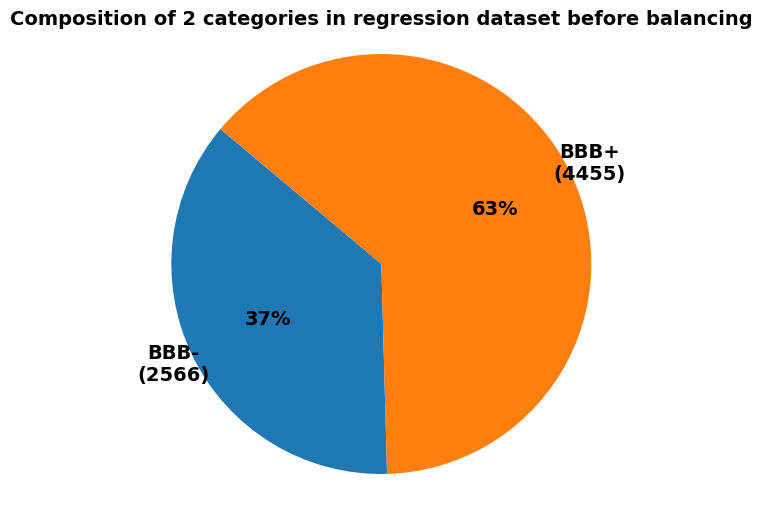

In [29]:
classification_BBB_N = (classification_df_expanded_cleaned
[classification_df_expanded_cleaned['BBB+/BBB-'] == 'BBB-']).shape[0]  #These
# are BBB-
classification_BBB_Y = (classification_df_expanded_cleaned
[classification_df_expanded_cleaned['BBB+/BBB-'] == 'BBB+']).shape[0]  #These
# are BBB+

simple_pie_plot(
    label_list=['BBB-', 'BBB+'],
    num_list=[classification_BBB_N, classification_BBB_Y],
    title_str='Composition of 2 categories in regression dataset before balancing'
)

plt.savefig(
    r'model_outputs\data_preprocessing\classification_before_balancing.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

In [30]:
X = classification_df_expanded_cleaned.loc[
    :,
    ~classification_df_expanded_cleaned.columns.isin(['SMILES', 'BBB+/BBB-'])
    ]
y = classification_df_expanded_cleaned['BBB+/BBB-']

### Under-sampling by ClusterCentroids

In [31]:
cluster_centroids = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=1),
    random_state=1
)

X_resample, y_resample = cluster_centroids.fit_resample(X, y)

classification_df_after_centroid_balancing = merge_multiple_dfs(
    df_list=[classification_df_expanded_cleaned['SMILES'], y_resample,
             X_resample])
classification_df_after_centroid_balancing

,SMILES,BBB+/BBB-,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,157_y,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y
0,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@H](NC(=...,BBB+,9.095732,9.095732,0.282774,-0.017526,0.586761,11.860043,358.488,332.280,...,0.333333,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,CCCCC[C@H](N)C(O)(c1ccccc1)c1ccccc1,BBB+,15.143070,15.143070,0.021937,-1.615734,0.147925,26.905882,1202.635,1090.747,...,1.000000,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)[C@H]...,BBB+,15.022344,15.022344,0.036460,-1.947471,0.109538,42.500000,1085.156,1008.548,...,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C(Cl)=...,BBB+,14.543654,14.543654,0.006968,-2.468650,0.116173,36.726027,1030.303,942.607,...,1.000000,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,CC(C)=CCN1Cc2cc(Cl)cc3[nH]c(=S)n(c23)C[C@@H]1C,BBB+,14.995286,14.995286,0.035518,-1.944947,0.109538,42.500000,1085.156,1008.548,...,1.000000,0.0,1.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,CC1CC2C(C(O)CC3(C)C2CCC3(O)C(=O)CO)C2(C)C=CC(=...,BBB-,12.428253,12.428253,0.083608,-1.721468,0.122643,47.948718,569.609,526.265,...,1.000000,1.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,0.0
5128,CC[C@H]1CC(=O)[C@@H]2Oc3c(OC)ccc4c3[C@@]23CCN(...,BBB-,12.559895,12.559895,0.048057,-3.487690,0.443295,22.448276,440.503,420.343,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5129,CN(C)C=Nc1c(I)cc(I)c(CCC(=O)O)c1I,BBB-,12.935121,12.935121,0.008292,-0.854188,0.192994,15.076923,551.769,498.345,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5130,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1,BBB-,13.042813,13.042813,0.190845,-3.798036,0.233814,31.275000,594.668,564.428,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.0


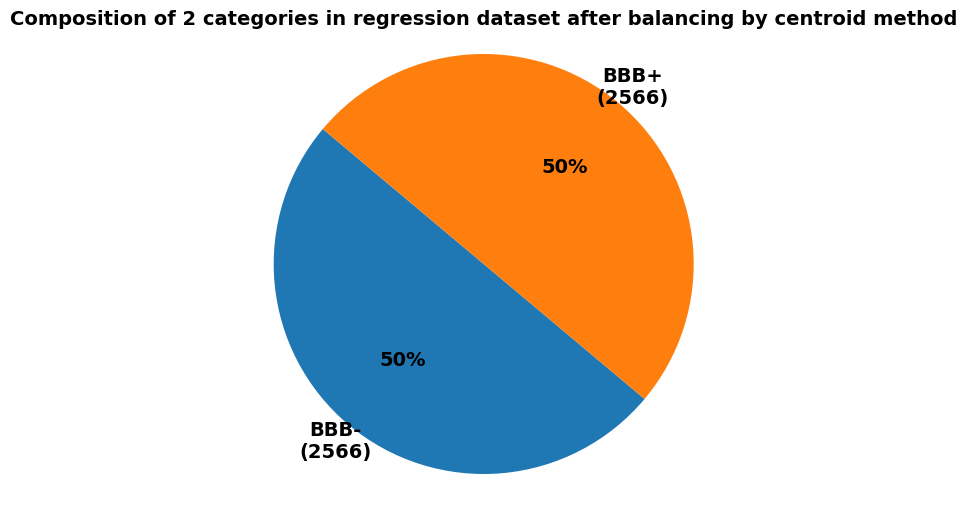

In [32]:
classification_BBB_N = (classification_df_after_centroid_balancing
[classification_df_after_centroid_balancing['BBB+/BBB-'] == 'BBB-']).shape[
    0]  #These
# are BBB-
classification_BBB_Y = (classification_df_after_centroid_balancing
[classification_df_after_centroid_balancing['BBB+/BBB-'] == 'BBB+']).shape[
    0]  #These
# are BBB+

simple_pie_plot(
    label_list=['BBB-', 'BBB+'],
    num_list=[classification_BBB_N, classification_BBB_Y],
    title_str='Composition of 2 categories in regression dataset after '
              'balancing by centroid method'
)

plt.savefig(
    r'model_outputs\data_preprocessing\classification_balanced_centroid.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

In [33]:
classification_df_after_centroid_balancing.to_csv(
    r'datasets\balanced_datasets\BBB_classification_balanced_centroid.csv.zip',
    index=False,
    compression='zip'
)
print('Done!')

Done!


### Over-sample by SMOTE then cleaning using ENN
Not using only SMOTE to create tons of hypothetical chemicals that might
not exist

In [34]:
smoteenn = SMOTEENN(random_state=1)

X_resample, y_resample = smoteenn.fit_resample(X, y)

classification_df_after_smoteenn_balancing = merge_multiple_dfs(
    df_list=[classification_df_expanded_cleaned['SMILES'], y_resample,
             X_resample])
classification_df_after_smoteenn_balancing

,SMILES,BBB+/BBB-,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,157_y,158_y,159_y,160_y,161_y,162_y,163_y,164_y,165_y,166_y
0,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@@H]3[C@H](NC(=...,BBB+,16.987088,16.987088,0.036070,-2.333658,0.607687,52.700000,444.902000,417.686000,...,1.000000,0.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,1.0,0.0
1,CCCCC[C@H](N)C(O)(c1ccccc1)c1ccccc1,BBB+,11.850791,11.850791,0.333611,-1.232222,0.556573,20.437500,224.260000,208.132000,...,0.000000,1.000000,1.000000,1.000000,1.0,0.0,1.0,1.000000,1.0,0.0
2,Cc1nnc(SCC2=C(C(=O)O)N3C(=O)[C@@H](NC(=O)[C@H]...,BBB+,13.647107,13.647107,0.012185,-1.422510,0.564246,42.285714,488.621000,448.301000,...,1.000000,0.000000,1.000000,1.000000,0.0,0.0,1.0,1.000000,1.0,0.0
3,C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C(Cl)=...,BBB+,11.649464,11.649464,0.198757,-0.198757,0.793104,26.576923,350.422000,328.246000,...,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,0.0
4,CC(C)=CCN1Cc2cc(Cl)cc3[nH]c(=S)n(c23)C[C@@H]1C,BBB+,11.786832,11.786832,0.063339,-0.683465,0.912447,33.200000,295.766000,277.622000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,O=c1[nH]cnc2c1ncn2[C@@H]1CC[C@@H](CO)O1,BBB-,13.634735,13.634735,0.027420,-2.184699,0.298412,28.342105,527.526000,498.294000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,0.0
6133,CCCCCCCCCCCCCCCCOP(=O)(O)OCC[N+](C)(C)C,BBB-,11.010582,11.010582,0.070069,-1.291404,0.195738,49.951014,448.391665,410.237000,...,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.0,1.000000,1.0,0.0
6134,O=C1CN2CCO[C@]2(c2ccccc2F)c2cc(Cl)ccc2N1CCO,BBB-,7.454496,7.454496,0.509827,0.401000,0.748302,12.771272,205.245974,191.543994,...,0.318647,0.681353,0.318647,0.318647,1.0,1.0,1.0,0.318647,1.0,0.0
6135,CC(C)(CO)C(O)C(=O)NCCCC(=O)O,BBB-,12.530398,12.530398,0.147649,-0.918220,0.208973,18.593750,471.492000,446.292000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.0,0.0,1.000000,1.0,0.0


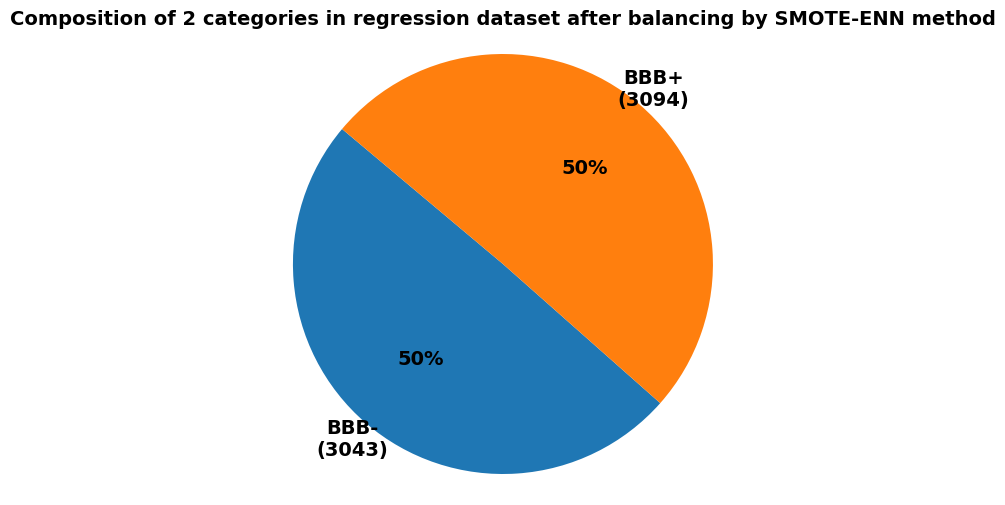

In [35]:
classification_BBB_N = (classification_df_after_smoteenn_balancing
[classification_df_after_smoteenn_balancing['BBB+/BBB-'] == 'BBB-']).shape[
    0]  #These
# are BBB-
classification_BBB_Y = (classification_df_after_smoteenn_balancing
[classification_df_after_smoteenn_balancing['BBB+/BBB-'] == 'BBB+']).shape[
    0]  #These
# are BBB+

simple_pie_plot(
    label_list=['BBB-', 'BBB+'],
    num_list=[classification_BBB_N, classification_BBB_Y],
    title_str='Composition of 2 categories in regression dataset after '
              'balancing by SMOTE-ENN method'
)

plt.savefig(
    r'model_outputs\data_preprocessing\classification_balanced_smoteenn.png',
    dpi=600,
    bbox_inches='tight'
)

plt.show()

In [36]:
classification_df_after_smoteenn_balancing.to_csv(
    r'datasets\balanced_datasets\BBB_classification_balanced_smoteenn.csv.zip',
    index=False,
    compression='zip'
)
print('Done!')

Done!
